In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Simulated discharge to the Arctic Ocean from greenland ice sheet melt

Data from Bamber et al. (2016). Monthly simulated fluxes to the Arctic Ocean from Greenland, Iceland, Svalbard, and areas around Canada. Focus on ice sheet and glacial melt, but also includes glacial carving and tundra runoff.

To do:
- Use the mask included in the netcdf to remove Iceland, Svalbard, etc. and just include Greenland
- Sum runoff_tundra and runoff_ice together, to get total runoff to the ocean.
- What to do with the solid_ice freshwater flux to the ocean? How big is this flux compared to the other two fluxes? If small, also just add to runoff_tundra and runoff_ice.
- Extrapolate to 2019 (just forward fill? Or if there's a trend since e.g. 2005, use that trend to predict future years?).
- Divide total summed discharge for the month by number of days in the month, to get mean monthly discharge.

In [2]:
# Open dataset and print metadata summary
ncml_path = f"~/shared/pan_arctic_data/freshwater_flux_from_terrestrial_ice/bamber_2016/FWF17.v3_b.nc"
ds = xr.open_dataset(ncml_path)
ds

<xarray.Dataset>
Dimensions:              (Y: 785, X: 752, TIME: 708)
Coordinates:
  * Y                    (Y) float64 -6.731e+04 -7.231e+04 ... -3.987e+06
  * X                    (X) float64 -1.778e+06 -1.773e+06 ... 1.977e+06
  * TIME                 (TIME) datetime64[ns] 1958-01-01 ... 2016-12-01
Data variables:
    runoff_tundra        (TIME, Y, X) float32 ...
    lon                  (Y, X) float64 ...
    runoff_ice           (TIME, Y, X) float32 ...
    lat                  (Y, X) float64 ...
    polar_stereographic  int8 ...
    solid_ice            (TIME, Y, X) float32 ...
    LSMGr                (Y, X) float32 ...
    ocean_basins         (Y, X) float32 ...
Attributes:
    Conventions:  CF-1.4
    institution:  University of Bristol (Andrew Tedstone)
    title:        Monthly freshwater fluxes to the ocean across the Arctic, 1...
    nx:           752.0
    ny:           785.0
    xmin:         -1777980.0
    ymax:         -67308.0
    spacing:      5000.0
    description:  This is the dataset that underlies the paper "Bamber, J., A...

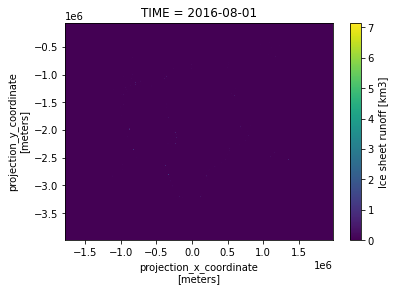

In [5]:
runoff_ice_2d = ds['runoff_ice'].isel(TIME=703)
runoff_ice_2d.plot()

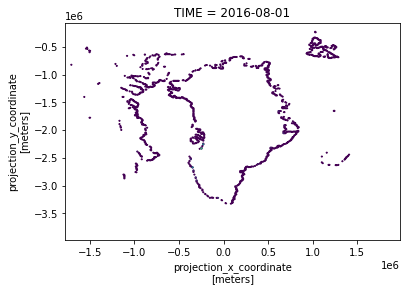

In [6]:
runoff_ice_2d.plot.contour()